In [2]:
import numpy as np

# Structured Data: NumPy's Structured Arrays


Say we need to store data of the following type

In [3]:
name = ['Alice', 'Bob', 'Cathy', 'Doug']
age = [25, 45, 37, 19]
weight = [55.0, 85.5, 68.0, 61.5]

But this is a bit clumsy. There is nothing that tells that the contents of the three arrays are related

In [4]:
X=np.zeros(4,dtype=int)
X

array([0, 0, 0, 0])

Remember creating simple arrays using expressions like the above one. We can use the same command to creat a structured array with multiple data types as follows

In [5]:
Data=np.zeros(4,dtype={'names':('name','age','weight'),'formats':('U10','int','float')})
Data#.dtype

array([('', 0, 0.), ('', 0, 0.), ('', 0, 0.), ('', 0, 0.)],
      dtype=[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

Here <br>
`U10`- Unicode String with maxlength=10char<br>
`i4`- 4 byte integer<br>
`f8`- 8 byte float<br>
After creating an empty container for our data, we can now fill it up with 

In [6]:
Data['name']=name
Data['age']=age
Data['weight']=weight
print(Data)

[('Alice', 25, 55. ) ('Bob', 45, 85.5) ('Cathy', 37, 68. )
 ('Doug', 19, 61.5)]


The handy thing with structured arrays is that you can now refer to values either by index or by name:

In [7]:
print(Data['name'])
print(Data['weight'])
print(Data[2])
print(Data[1:3]['name'])

['Alice' 'Bob' 'Cathy' 'Doug']
[55.  85.5 68.  61.5]
('Cathy', 37, 68.)
['Bob' 'Cathy']


In [8]:
#One  can also try experimenting with boolean masking
Data[Data['age']<30]['name']

array(['Alice', 'Doug'], dtype='<U10')

It's better to consider using Pandas package to perform more complicated operations

## Creating Structured Arrays

'Structured array' data types can be declared/defined in multiple ways

In [9]:
#Dictionary-way
np.dtype({'names':('name', 'age', 'weight'),'formats':('U10', 'i4', 'f8')})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

For clarity, numerical types can be specified using Python types or NumPy dtypes instead:

In [10]:
np.dtype({'names':('name', 'age', 'weight'),'formats':((np.str_, 10), int, np.float32)})

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f4')])

In [11]:
# As a list of tuples
np.dtype([('name','U10'),('age',int),('weight','f8')])

dtype([('name', '<U10'), ('age', '<i4'), ('weight', '<f8')])

In [12]:
#Or it can also be defined by specifying the types alone separated with a comma
np.dtype('S10,U10,i8,f8')

dtype([('f0', 'S10'), ('f1', '<U10'), ('f2', '<i8'), ('f3', '<f8')])

The unique way of writing datatypes (`U10`, `i8`, `>f8`, `<S10`) are all built on a simple principle<br>
* The first (optional) character is < or >, which means "little endian" or "big endian," respectively, and specifies the ordering convention for significant bits.<br>
* The next character specifies the type of data: characters, bytes, ints, floating points, and so on (see the table below).<br>
* The last character or characters represents the size of the object in bytes.

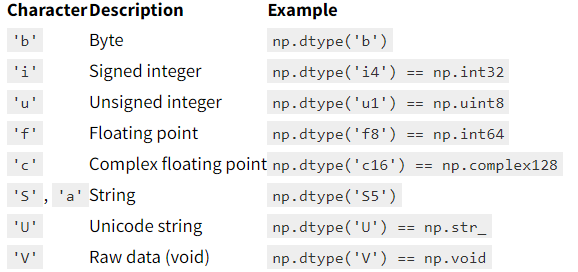



## More Advenced Compound Types

You can also creat data types where each element of this data type contains an array of matrix of values

In [21]:
tp=np.dtype([('idNumber','i8'),('Matrix','f8',(3,3))])
X=np.zeros(1,dtype=tp)
print(X[0]['idNumber'])

X['idNumber']=16
X['Matrix']=[[1,2,3],[4,5,6],[7,8,9]]
X

0


array([(16, [[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])],
      dtype=[('idNumber', '<i8'), ('Matrix', '<f8', (3, 3))])